In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
#1. Read the dataset to the python environment


data = pd.read_csv("titanic_dataset (1)_1.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data = pd.read_csv("titanic_dataset (1)_1.csv",index_col="PassengerId")
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
data.shape

(891, 11)

In [12]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [14]:
%whos

Variable                     Type         Data/Info
---------------------------------------------------
BernoulliNB                  ABCMeta      <class 'sklearn.naive_bayes.BernoulliNB'>
DecisionTreeClassifier       ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GradientBoostingClassifier   ABCMeta      <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
KNeighborsClassifier         ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression           type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier       ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SVC                          ABCMeta      <class 'sklearn.svm._classes.SVC'>
StandardScaler               type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
accuracy_score               function     <function accuracy_score at 0x0000022B873CC4C0>
confusion_matrix             function     <function confu

In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


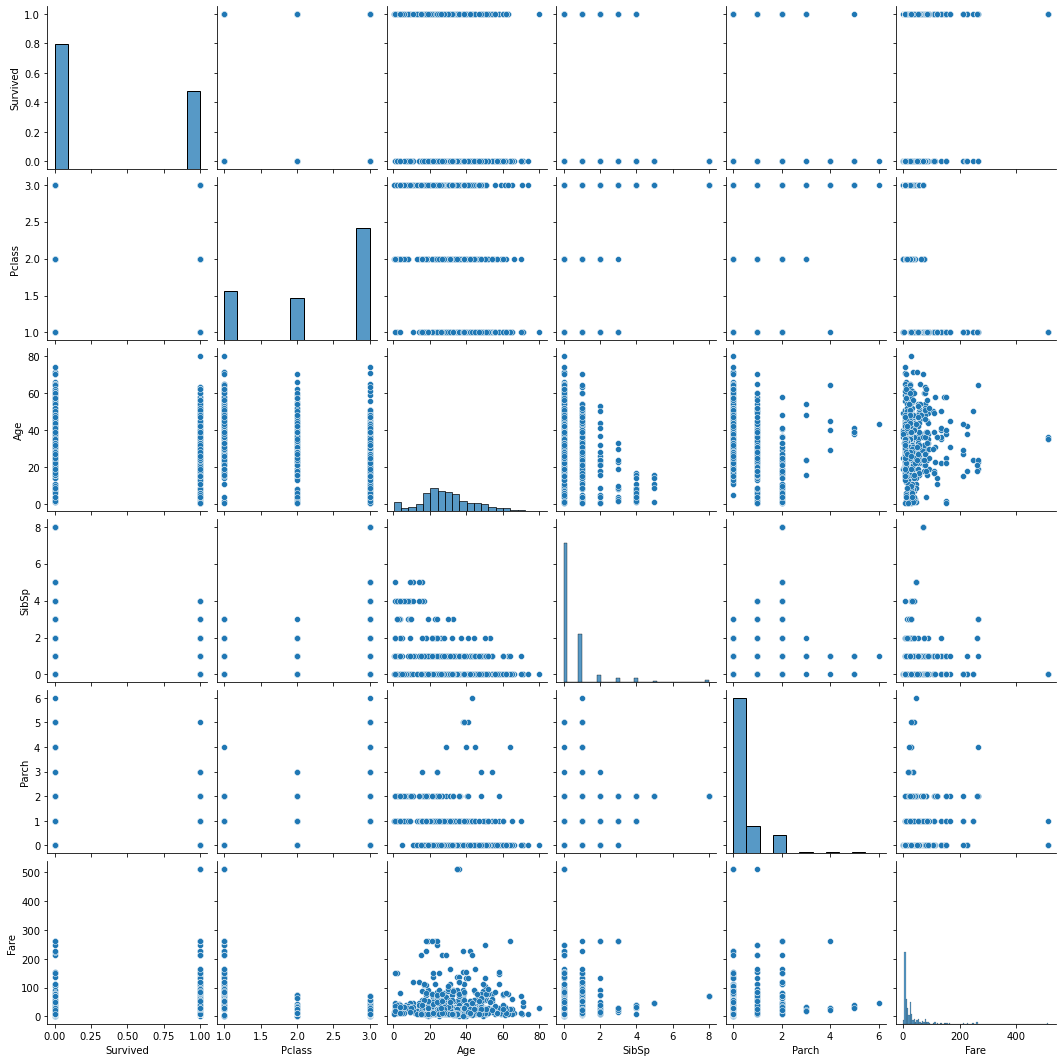

In [16]:
sns.pairplot(data)

In [17]:
#checking null values

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

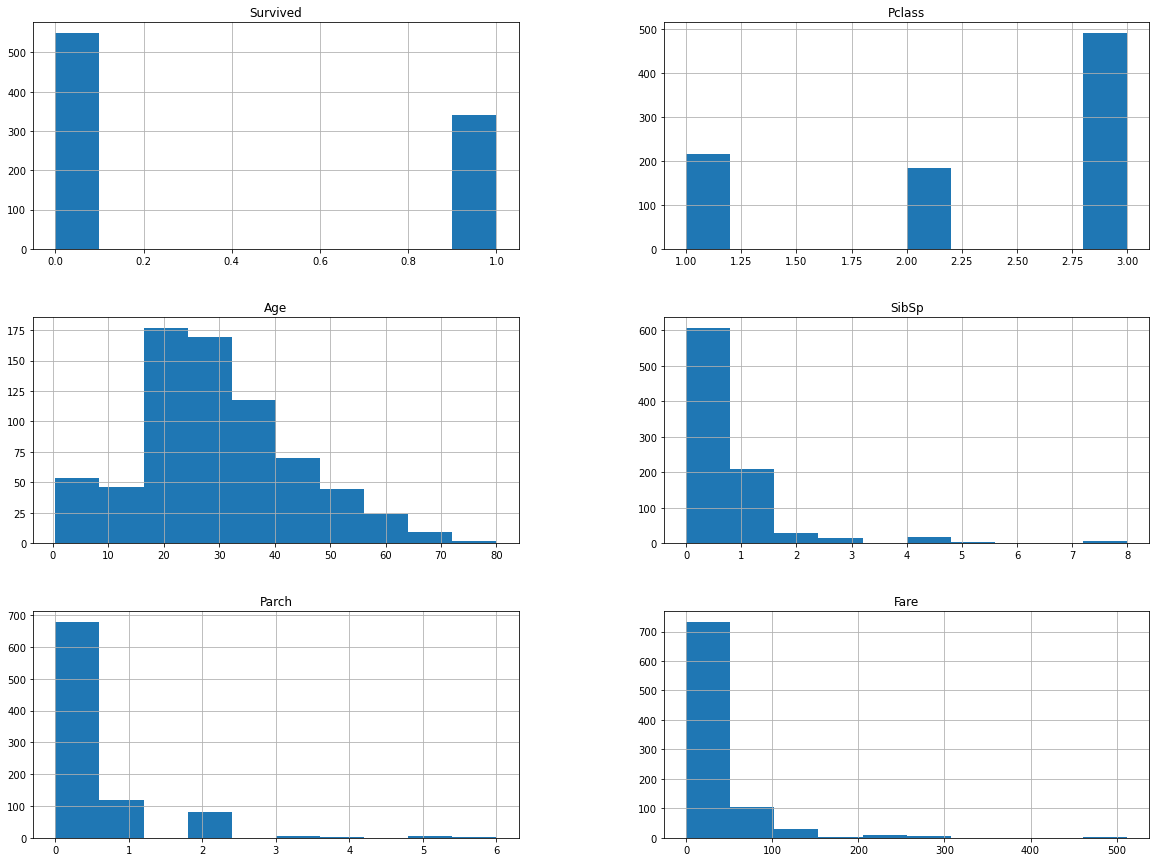

In [18]:
fregraph=data.select_dtypes(include=["float","int"])
fregraph.hist(figsize=(20,15))
plt.show()

In [19]:
data["Age"]=data["Age"].fillna(data["Age"].median())


# removing cabincolumn from the dataset

data.drop(['Cabin'],inplace=True,axis=1)
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

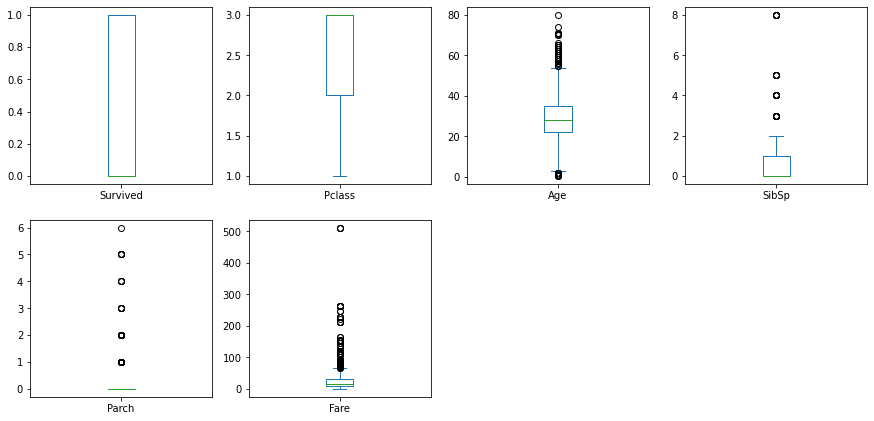

In [20]:
#checking outliers
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.title("Outlier Visualization ")
plt.show()

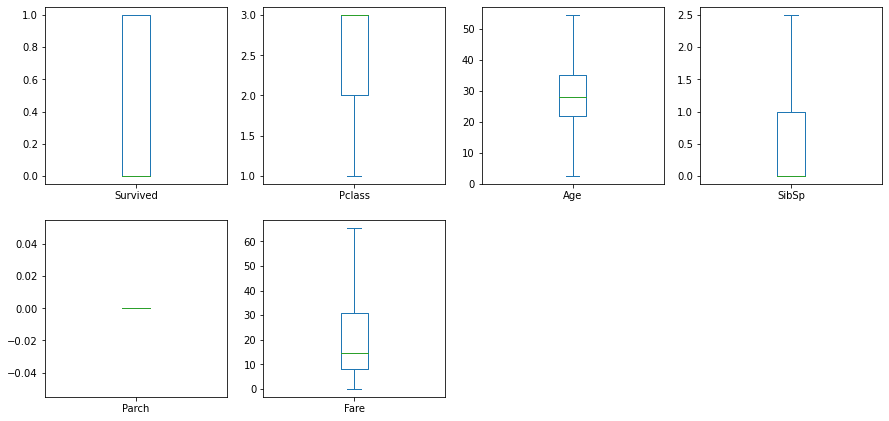

In [21]:
#handling outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
#Parch
lr,ur=remove_outlier(data["Parch"])
data["Parch"]=np.where(data["Parch"]>ur,ur,data["Parch"])
data["Parch"]=np.where(data["Parch"]<lr,lr,data["Parch"])
#SibSp
lr,ur=remove_outlier(data["SibSp"])
data["SibSp"]=np.where(data["SibSp"]>ur,ur,data["SibSp"])
data["SibSp"]=np.where(data["SibSp"]<lr,lr,data["SibSp"])
#Age
lr,ur=remove_outlier(data["Age"])
data["Age"]=np.where(data["Age"]>ur,ur,data["Age"])
data["Age"]=np.where(data["Age"]<lr,lr,data["Age"])
#Fare
lr,ur=remove_outlier(data["Fare"])
data["Fare"]=np.where(data["Fare"]>ur,ur,data["Fare"])
data["Fare"]=np.where(data["Fare"]<lr,lr,data["Fare"])
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.title(" After removing Outlier  ")
plt.show()

In [22]:
#removing name column
data.drop(['Name','Ticket'],inplace=True,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0.0,7.2500,S
2,1,1,female,38.0,1.0,0.0,65.6344,C
3,1,3,female,26.0,0.0,0.0,7.9250,S
4,1,1,female,35.0,1.0,0.0,53.1000,S
5,0,3,male,35.0,0.0,0.0,8.0500,S


In [23]:
sex_mapping = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(sex_mapping)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1.0,0.0,7.2500,S
2,1,1,1,38.0,1.0,0.0,65.6344,C
3,1,3,1,26.0,0.0,0.0,7.9250,S
4,1,1,1,35.0,1.0,0.0,53.1000,S
5,0,3,0,35.0,0.0,0.0,8.0500,S


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,2,0,22,1,0,18,2
2,1,0,1,45,1,0,203,0
3,1,2,1,28,0,0,41,2
4,1,0,1,41,1,0,189,2
5,0,2,0,41,0,0,43,2


<AxesSubplot:>

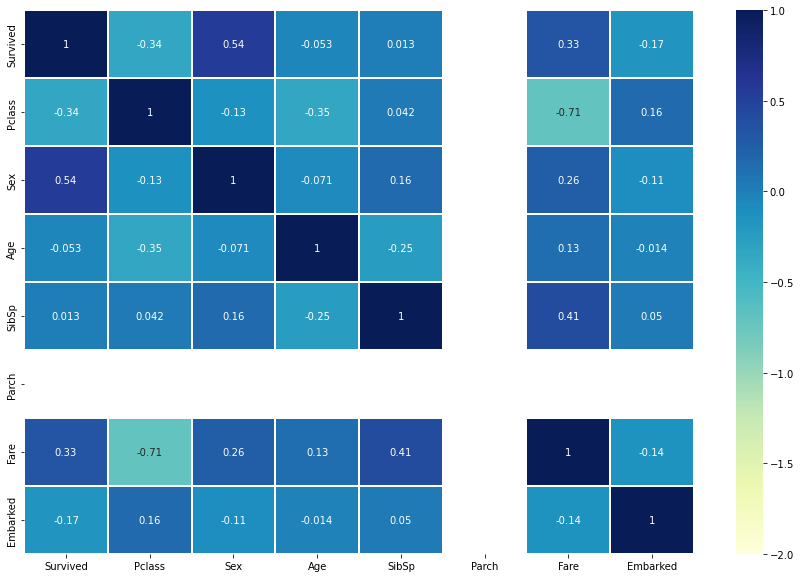

In [25]:
#correlation between variables
corrmatrix =data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [26]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
y= data['Embarked']
x=data.drop(['Embarked'],axis=1)
x.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
#standardScaler
from sklearn.preprocessing import StandardScaler
# Convert data to have zero mean and unit variance
scaler = StandardScaler()
x= scaler.fit_transform(x)
x

array([[-0.78927234,  0.82737724, -0.73769513, ...,  0.69538815,
         0.        , -1.29574067],
       [ 1.2669898 , -1.56610693,  1.35557354, ...,  0.69538815,
         0.        ,  1.54155908],
       [ 1.2669898 ,  0.82737724,  1.35557354, ..., -0.57426522,
         0.        , -0.94299529],
       ...,
       [-0.78927234,  0.82737724,  1.35557354, ...,  0.69538815,
         0.        ,  0.43731269],
       [ 1.2669898 , -1.56610693, -0.73769513, ..., -0.57426522,
         0.        ,  0.77472131],
       [-0.78927234,  0.82737724, -0.73769513, ..., -0.57426522,
         0.        , -1.1116996 ]])

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [30]:
print(y_train.value_counts(),'\n', y_test.value_counts())

2    527
0    125
1     60
Name: Embarked, dtype: int64 
 2    119
0     43
1     17
Name: Embarked, dtype: int64


In [31]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr =logit_model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Test Accuracy of Logistic Regression classifier: {}%".format(round(logit_model.score(x_test, y_test)*100, 2)))

Test Accuracy of Logistic Regression classifier: 66.48%


In [32]:
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        17
           2       0.66      1.00      0.80       119

    accuracy                           0.66       179
   macro avg       0.22      0.33      0.27       179
weighted avg       0.44      0.66      0.53       179



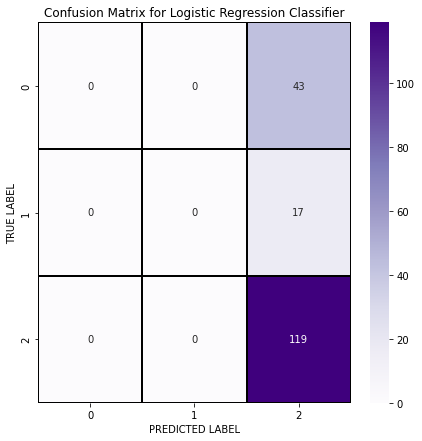

In [33]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0","1", "2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i

print("""Best KNN Value of KNN Classifier: {}
Test Accuracy  of KNN Classifier: {}%""".format(best_Kvalue, round(best_score*100,2)))   

Best KNN Value of KNN Classifier: 1
Test Accuracy  of KNN Classifier: 98.46%


In [35]:
y_pred_knn = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.55      0.14      0.22        43
           1       0.82      0.53      0.64        17
           2       0.71      0.94      0.81       119

    accuracy                           0.71       179
   macro avg       0.69      0.54      0.56       179
weighted avg       0.68      0.71      0.65       179



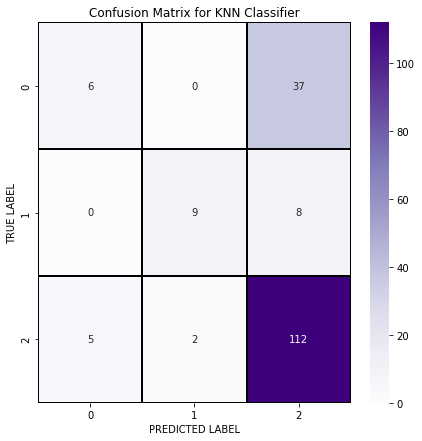

In [36]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["0","1", "2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [37]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
print("Test Accuracy of Linear svm Classifier: {}%".format(round(svm_linear.score(x_test, y_test)*100, 2)))

Test Accuracy of Linear svm Classifier: 66.48%


In [39]:
y_pred_ls =svm_linear.predict(x_test)
print("Linear svm  Classifier report: \n\n", classification_report(y_test, y_pred_ls))

Linear svm  Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        17
           2       0.66      1.00      0.80       119

    accuracy                           0.66       179
   macro avg       0.22      0.33      0.27       179
weighted avg       0.44      0.66      0.53       179



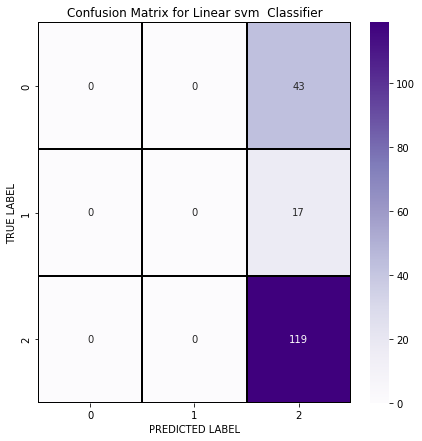

In [40]:
cm = confusion_matrix(y_test, y_pred_ls)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0","1", "2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Linear svm  Classifier')
plt.show()

In [41]:
from sklearn.svm import SVC
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [42]:
print("Test Accuracy of Polynomial SVM Classifier: {}%".format(round(svm_poly.score(x_test, y_test)*100, 2)))

Test Accuracy of Polynomial SVM Classifier: 66.48%


In [43]:
y_pred_ps =svm_poly.predict(x_test)
print("Polynomial SVM Classifier report: \n\n", classification_report(y_test, y_pred_ps))

Polynomial SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        17
           2       0.66      1.00      0.80       119

    accuracy                           0.66       179
   macro avg       0.22      0.33      0.27       179
weighted avg       0.44      0.66      0.53       179



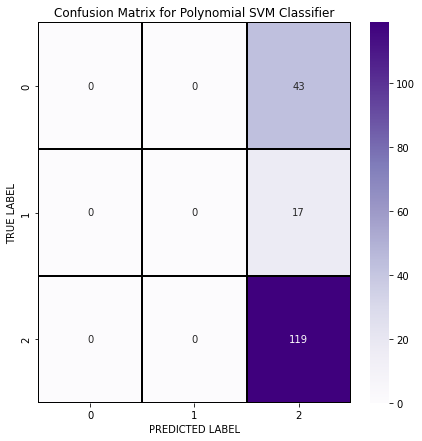

In [44]:
cm = confusion_matrix(y_test, y_pred_ps)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Polynomial SVM Classifier')
plt.show()


In [45]:
from sklearn.svm import SVC
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)

SVC()

In [46]:
print("Test Accuracy of Radial svm Classifier: {}%".format(round(svm_linear.score(x_test, y_test)*100, 2)))

Test Accuracy of Radial svm Classifier: 66.48%


In [47]:
y_pred_rs =svm_radial.predict(x_test)
print("Radial SVM Classifier report: \n\n", classification_report(y_test, y_pred_rs))

Radial SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.00      0.00      0.00        17
           2       0.66      1.00      0.80       119

    accuracy                           0.66       179
   macro avg       0.22      0.33      0.27       179
weighted avg       0.44      0.66      0.53       179



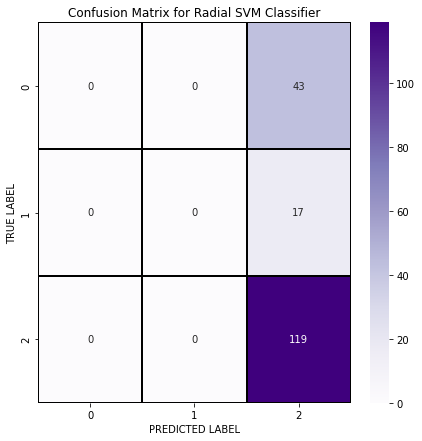

In [48]:
cm = confusion_matrix(y_test, y_pred_rs)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Radial SVM Classifier')
plt.show()

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model =  DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
print("Test Accuracy of Decision tree Classifier: {}%".format(round(dt_model.score(x_test, y_test)*100, 2)))

Test Accuracy of Decision tree Classifier: 77.09%


In [51]:
y_pred_dt =dt_model.predict(x_test)
print(" Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

 Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.61      0.82      0.70        17
           2       0.80      0.89      0.84       119

    accuracy                           0.77       179
   macro avg       0.73      0.71      0.70       179
weighted avg       0.78      0.77      0.76       179



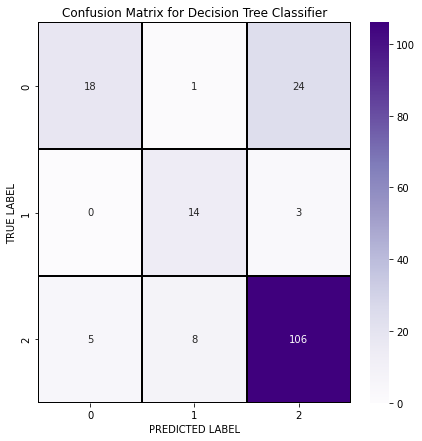

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
print("Test Accuracy of Random Forest Classifier: {}%".format(round(rfc.score(x_test, y_test)*100, 2)))

Test Accuracy of Random Forest Classifier: 74.86%


In [55]:
y_pred_rf = rfc.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.67      0.28      0.39        43
           1       0.63      0.71      0.67        17
           2       0.77      0.92      0.84       119

    accuracy                           0.75       179
   macro avg       0.69      0.64      0.63       179
weighted avg       0.74      0.75      0.72       179



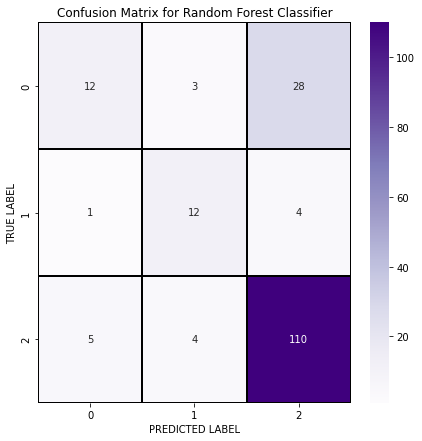

In [56]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [92]:
print("Test Accuracy of Gradient Boosting Classifier: {}%".format(round(gbc.score(x_test, y_test)*100, 2)))

Test Accuracy of Gradient Boosting Classifier: 77.09%


In [90]:
y_pred_gbc = gbc.predict(x_test)
print("Gradient Boosting Classifier report: \n\n", classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier report: 

               precision    recall  f1-score   support

           0       0.71      0.35      0.47        43
           1       0.86      0.71      0.77        17
           2       0.77      0.93      0.84       119

    accuracy                           0.77       179
   macro avg       0.78      0.66      0.70       179
weighted avg       0.77      0.77      0.75       179



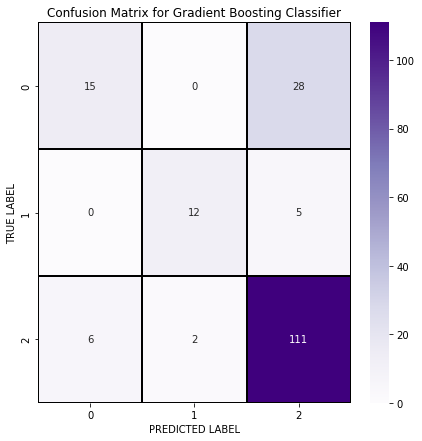

In [93]:
cm = confusion_matrix(y_test, y_pred_gbc)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [94]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [95]:
from xgboost import XGBClassifier


ModuleNotFoundError: No module named 'xgboost'

In [96]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)

NameError: name 'XGBClassifier' is not defined

NameError: name 'y_pred_eg' is not defined

In [86]:
cm = confusion_matrix(y_test, y_pred_eg)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0", "1","2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra gradiant boosting Classifier')
plt.show()

NameError: name 'y_pred_eg' is not defined

In [87]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Test Accuracy of Naive Bayes Classification: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy of Naive Bayes Classification: 69.83%


In [88]:
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.53      0.44      0.48        43
           1       0.70      0.41      0.52        17
           2       0.74      0.83      0.79       119

    accuracy                           0.70       179
   macro avg       0.66      0.56      0.60       179
weighted avg       0.69      0.70      0.69       179



In [89]:
cm = confusion_matrix(y_test, y_pred_eg)
x_axis_labels = ["0", "1","2"]
y_axis_labels = ["0","1", "2"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

NameError: name 'y_pred_eg' is not defined